# Space titanic *Project*

> 손상된 우주선 컴퓨터 시스템에서 복구된 기록을 사용하여 어떤 승객들이 이상 현상에 의해 이송되었는지 예측한다.



## 목차

### 1. 문제 정의 및 데이터 개요
- 프로젝트 개요
- 예측 목표
- 데이터셋 구조 파악
- 환경 설정 및 데이터 불러오기
- Spaceship Titanic 데이터 특성 상세 설명
-  데이터 기본 구조 확인

### 2. 탐색적 데이터 분석(EDA)
- 결측치 확인 및 시각화
- 타켓 분석

### 3. 데이터 전처리
- 결측치 채우기
- Feature Engineering
- 결측치 처리 확인
- 데이터 인코딩

### 4. 모델링
- 앙상블 모델 사용
- 모델 학습
- 정확도 확인

### 5. 예측 및 제출
- 테스트 데이터를 통한 예측
- 제출 파일 생성


## 1. 문제 정의 및 데이터 개요








### 1.1 프로젝트 개요

본 프로젝트는 Kaggle의 'Spaceship Titanic' 경진대회를 기반으로 진행됩니다. 우주선 Spaceship Titanic이 시공간 이상 현상과 충돌하면서 일부 승객들이 다른 차원으로 이동되는 사건이 발생했습니다. 우리는 주어진 승객 데이터를 분석하여 각 승객이 다른 차원으로 이동되었는지 여부를 예측하는 모델을 개발할 것입니다.

### 1.2 예측 목표

타겟 변수(Target Variable): Transported

- True: 승객이 다른 차원으로 이동됨
- False: 승객이 원래 차원에 남아있음

최종 목표는 테스트 데이터에 포함된 승객들에 대해 이동 여부를 정확하게 예측하는 것입니다.

### 1.3 데이터셋 구조 파악

Kaggle에서 제공하는 데이터는 총 3개의 파일로 구성되어 있습니다:

1. train.csv (학습 데이터)

- 모델을 학습시키기 위한 데이터
- 승객 정보와 함께 정답(Transported 여부)이 포함되어 있음

2. test.csv (테스트 데이터)

- 실제로 예측해야 할 데이터
- 승객 정보만 있고 정답은 없음

3. sample_submission.csv (제출 형식 예시)

- Kaggle에 제출할 때 사용하는 파일 형식의 예시

### 1.4 환경 설정 및 데이터 불러오기

데이터 분석을 시작하기 위해 필요한 Python 라이브러리들을 불러옵니다.

In [ ]:
#python

# 데이터 처리를 위한 라이브러리
import pandas as pd
import numpy as np

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 한글 표시 설정 (Gemini 도움 받음)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 경고 메시지 숨김 (Gemini 도움 받음)
import warnings
warnings.filterwarnings('ignore')

print("라이브러리를 성공적으로 불러왔습니다.")

라이브러리를 성공적으로 불러왔습니다.


이제 실제 데이터를 불러옵니다.

In [ ]:
# 데이터 불러오기
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission (5).csv
Saving test.csv to test (6).csv
Saving train.csv to train (6).csv


In [ ]:
# 그 다음 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 데이터 크기 확인
print(f"\n 학습 데이터 크기: {train.shape[0]:,}행 × {train.shape[1]}열")
print(f" 테스트 데이터 크기: {test.shape[0]:,}행 × {test.shape[1]}열")
print("\n 총 {0:,}명의 승객 데이터를 분석합니다.".format(train.shape[0] + test.shape[0]))

# 데이터 타입 확인
print("-"*70)
print("train, test 데이터 타입을 확인합니다.")
train.info()
test.info()


 학습 데이터 크기: 8,693행 × 14열
 테스트 데이터 크기: 4,277행 × 13열

 총 12,970명의 승객 데이터를 분석합니다.
----------------------------------------------------------------------
train, test 데이터 타입을 확인합니다.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6)

### 1.5 Spaceship Titanic 데이터 특성 상세 설명

| 컬럼명 (Feature) | 설명 (Description) |
| :--- | :--- |
| **PassengerId** | 승객 고유 ID. `gggg_pp` 형태 (gggg: 그룹 번호, pp: 그룹 내 순번) |
| **HomePlanet** | 승객이 출발한 행성 (거주지) |
| **CryoSleep** | 동면(suspended animation) 여부. 동면 중인 승객은 객실 내에만 머무름 |
| **Cabin** | 객실 번호. `deck/num/side` 형태 (side는 P:좌현 또는 S:우현) |
| **Destination** | 승객이 하차할 목적지 행성 |
| **Age** | 승객의 나이 |
| **VIP** | 특별 VIP 서비스 결제 여부 |
| **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** | 우주선 내 각종 유료 편의시설에서 지불한 금액 |
| **Name** | 승객의 이름과 성 |
| **Transported** | **(Target)** 다른 차원으로 이동되었는지 여부 (예측 목표) |

### 1.6 데이터 기본 구조 확인

학습 데이터의 처음 몇 행을 살펴보면서 데이터가 어떻게 구성되었는지 이해할 수 있습니다.

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### 1.7 소결

이번 섹션에서는 Spaceship Titanic 프로젝트의 목표를 이해하고, 필요한 데이터를 성공적으로 불러왔습니다. 학습 데이터에는 8,693명, 테스트 데이터에는 4,277명의 승객 정보가 포함되어 있으며, 총 12,970명의 승객 데이터를 다루게 됩니다.

다음 섹션에서는 데이터의 각 컬럼이 무엇을 의미하는지, 어떤 값들이 들어있는지 더 자세히 살펴보겠습니다.

## 2. 탐색적 데이터 분석 (EDA)

### 2.1 결측치 확인 및 시각화

탐색적 데이터 분석의 첫 단계로 결측치(비어있는 값)를 확인합니다. 결측치는 데이터 분석과 모델링에 영향을 미칠 수 있으므로 반드시 파악해야 합니다.

#### 2.1.1 결측치 개수 확인

In [ ]:
# 결측치 개수 확인
missing_train = train.isnull().sum()
missing_percent = (train.isnull().sum() / len(train) * 100).round(2) # 결측치 비율도 확인(Gemini 도움 받음)

missing_df = pd.DataFrame({
    '결측치 개수': missing_train,
    '비율(%)': missing_percent
})

# 결측치가 있는 컬럼만 출력 (Gemini 도움 받음)
print(missing_df[missing_df['결측치 개수'] > 0].sort_values('결측치 개수', ascending=False))

              결측치 개수  비율(%)
CryoSleep        217   2.50
ShoppingMall     208   2.39
VIP              203   2.34
HomePlanet       201   2.31
Name             200   2.30
Cabin            199   2.29
VRDeck           188   2.16
FoodCourt        183   2.11
Spa              183   2.11
Destination      182   2.09
RoomService      181   2.08
Age              179   2.06


### 2.2 타겟 분석

#### 2.2.1 이송 인원 / 비이송 인원 분포 확인

우리가 예측해야 할 타겟 변수인 'Transported'의 분포를 확인합니다.

In [ ]:
transported_counts = train['Transported'].value_counts()
transported_ratio = train['Transported'].value_counts(normalize=True) * 100

print(f"\n이송됨(True): {transported_counts[True]:,}명 ({transported_ratio[True]:.2f}%)")
print(f"이송 안됨(False): {transported_counts[False]:,}명 ({transported_ratio[False]:.2f}%)")


이송됨(True): 4,378명 (50.36%)
이송 안됨(False): 4,315명 (49.64%)


위 데이터를 보고 50% 이상의 인원이 'Transported' 임을 확인할 수 있었습니다.

#### 2.2.2 나이대별 이송 인원 분포 확인

In [ ]:
# 나이대 구간 생성
train['AgeGroup'] = pd.cut(train['Age'],
                           bins=[0, 12, 18, 30, 50, 100],
                           labels=['어린이(0-12)', '청소년(13-18)',
                                   '청년(19-30)', '중년(31-50)', '장년(51+)'])

# 이송된 사람만 필터링
transported_only = train[train['Transported'] == True]

# 나이대별 이송 인원
age_distribution = transported_only.groupby('AgeGroup').size()

# 전체 이송 인원
total_transported = age_distribution.sum()

# 비율 계산
age_percentage = (age_distribution / total_transported * 100).round(2)

# 결과 표로 정리
result = pd.DataFrame({
    '이송 인원': age_distribution,
    '비율(%)': age_percentage
})

print(f"전체 이송 인원: {total_transported:,}명")
print(result.to_string())
print(f"합계: {result['비율(%)'].sum():.1f}%")

전체 이송 인원: 4,144명
            이송 인원  비율(%)
AgeGroup                
어린이(0-12)     420  10.14
청소년(13-18)    569  13.73
청년(19-30)    1516  36.58
중년(31-50)    1282  30.94
장년(51+)       357   8.61
합계: 100.0%


나이대별 이송 인원 분포를 분석한 결과, 다음과 같은 특징이 발견되었습니다. 전체 이송 인원 중 청년층(19-30세)이 36.58%로 가장 높은 비율을 차지하였으며, 중년층(31-50세)이 30.94%로 그 뒤를 이었습니다. 두 연령대를 합산하면 전체 이송 인원의 약 66%에 해당하여, 경제활동이 활발한 연령대에서 이송 비율이 특히 높게 나타났습니다.

#### 2.2.3 동면 여부별 이송 인원 분포 확인

In [ ]:
# 이송된 사람만 필터링
transported_only = train[train['Transported'] == True]

# 동면 여부별 이송 인원
cryosleep_distribution = transported_only['CryoSleep'].value_counts()

# 전체 이송 인원
total_transported = len(transported_only)

# 비율 계산
cryosleep_percentage = (cryosleep_distribution / total_transported * 100).round(2)

# 결과 표로 정리
result = pd.DataFrame({
    '이송 인원': cryosleep_distribution,
    '비율(%)': cryosleep_percentage
})

# 인덱스 이름 변경
result.index = result.index.map({True: '동면함', False: '동면 안함'})

print(f"전체 이송 인원: {total_transported:,}명")
print(result.to_string())

전체 이송 인원: 4,378명
           이송 인원  비율(%)
CryoSleep              
동면함         2483  56.72
동면 안함       1789  40.86


#### 2.2.4 객실 번호별 이송 인원 분포 확인

In [ ]:
# Cabin을 Deck, Num, Side로 분리 (Gemini 도움 받음)
train['Deck'] = train['Cabin'].str.split('/').str[0]
train['Cabin_Num'] = train['Cabin'].str.split('/').str[1]
train['Side'] = train['Cabin'].str.split('/').str[2]

# 데이터 확인
print(train[['Cabin', 'Deck', 'Cabin_Num', 'Side']].head(10))

   Cabin Deck Cabin_Num Side
0  B/0/P    B         0    P
1  F/0/S    F         0    S
2  A/0/S    A         0    S
3  A/0/S    A         0    S
4  F/1/S    F         1    S
5  F/0/P    F         0    P
6  F/2/S    F         2    S
7  G/0/S    G         0    S
8  F/3/S    F         3    S
9  B/1/P    B         1    P


##### 2.2.4.1 전체 이송 인원 중 Deck별 분포

In [ ]:
# 이송된 사람만 필터링
transported_only = train[train['Transported'] == True]

# Deck별 이송 인원
deck_distribution = transported_only['Deck'].value_counts().sort_index()

# 전체 이송 인원
total_transported = len(transported_only)

# 비율 계산
deck_percentage = (deck_distribution / total_transported * 100).round(2)

# 결과 표
result = pd.DataFrame({
    '이송 인원': deck_distribution,
    '비율(%)': deck_percentage
})

print(f"전체 이송 인원: {total_transported:,}명")
print("Deck별 이송 인원 분포")
print(result.to_string())

전체 이송 인원: 4,378명
Deck별 이송 인원 분포
      이송 인원  비율(%)
Deck              
A       127   2.90
B       572  13.07
C       508  11.60
D       207   4.73
E       313   7.15
F      1229  28.07
G      1321  30.17
T         1   0.02


위 데이터를 확인해보니 F,G 데크를 이용한 사람들의 이송 비율이 상당히 높은 것을 알 수 있습니다. F,G 데크 사람들의 소비 금액을 확인해볼 필요가 있습니다.

###### 2.2.4.1.1 전체 이송 인원 중 Side별 분포

In [ ]:
# 이송된 사람만 필터링
transported_only = train[train['Transported'] == True]

# Side별 이송 인원
side_distribution = transported_only['Side'].value_counts()

# 비율 계산
side_percentage = (side_distribution / len(transported_only) * 100).round(2)

# 결과 표
result = pd.DataFrame({
    '이송 인원': side_distribution,
    '비율(%)': side_percentage
})

result.index = result.index.map({'P': 'Port(좌현)', 'S': 'Starboard(우현)'})

print("객실 위치(Side)별 이송 인원 분포")
print(result.to_string())

# Side별 이송 확률
side_stats = train.groupby('Side')['Transported'].agg([
    ('전체 인원', 'count'),
    ('이송 인원', 'sum')
])

side_stats['이송 확률(%)'] = (side_stats['이송 인원'] / side_stats['전체 인원'] * 100).round(2)
side_stats.index = side_stats.index.map({'P': 'Port(좌현)', 'S': 'Starboard(우현)'})

print("\n객실 위치(Side)별 이송 확률")
print(side_stats.to_string())

객실 위치(Side)별 이송 인원 분포
               이송 인원  비율(%)
Side                       
Starboard(우현)   2380  54.36
Port(좌현)        1898  43.35

객실 위치(Side)별 이송 확률
               전체 인원  이송 인원  이송 확률(%)
Side                                 
Port(좌현)        4206   1898     45.13
Starboard(우현)   4288   2380     55.50


위 데이터는 이송 인원을 분석할 때 크게 유의미한 데이터가 아닌 것 같습니다.

#### 2.2.5 전체 이송 인원 중 출발 행성별 분

In [ ]:
# 이송된 사람만 필터링
transported_only = train[train['Transported'] == True]

# 출발 행성별 이송 인원
planet_distribution = transported_only['HomePlanet'].value_counts()

# 전체 이송 인원
total_transported = len(transported_only)

# 비율 계산
planet_percentage = (planet_distribution / total_transported * 100).round(2)

# 결과 표
result = pd.DataFrame({
    '이송 인원': planet_distribution,
    '비율(%)': planet_percentage
})

print(f"전체 이송 인원: {total_transported:,}명")
print("-" * 70)
print("출발 행성별 이송 인원 분포")
print(result.to_string())
print(f"합계: {result['비율(%)'].sum():.1f}%")

# 출발 행성별 이송 확률
planet_stats = train.groupby('HomePlanet')['Transported'].agg([
    ('전체 인원', 'count'),
    ('이송 인원', 'sum')
])

planet_stats['이송 확률(%)'] = (planet_stats['이송 인원'] / planet_stats['전체 인원'] * 100).round(2)
planet_stats = planet_stats.sort_values('이송 확률(%)', ascending=False)

print("-" * 70)
print("출발 행성별 이송 확률")
print(planet_stats.to_string())

전체 이송 인원: 4,378명
----------------------------------------------------------------------
출발 행성별 이송 인원 분포
            이송 인원  비율(%)
HomePlanet              
Earth        1951  44.56
Europa       1404  32.07
Mars          920  21.01
합계: 97.6%
----------------------------------------------------------------------
출발 행성별 이송 확률
            전체 인원  이송 인원  이송 확률(%)
HomePlanet                        
Europa       2131   1404     65.88
Mars         1759    920     52.30
Earth        4602   1951     42.39


위 데이터를 보니 출발 행성별 이송 확률이 더 중요하다. 그 이유는 출발 행성별 이송 인원 분포는 애초에 많은 인원이 출발한 행성에 대한 데이터를 포함하고 있지 않기 때문이다.

#### 2.2.6 VIP 여부에 따른 이송 인원 분포 확인

In [ ]:
# 전체 이송 인원
total_transported = train['Transported'].sum()
print(f"전체 이송 인원: {total_transported:,}명")
print("-" * 70)

# VIP 여부별 이송 확률
print("VIP 여부별 이송 확률")
vip_stats = train.groupby('VIP').agg({
    'Transported': ['count', 'sum']
}).reset_index()
vip_stats.columns = ['VIP', '전체 인원', '이송 인원']
vip_stats['이송 확률(%)'] = (vip_stats['이송 인원'] / vip_stats['전체 인원'] * 100).round(2)
vip_stats['VIP'] = vip_stats['VIP'].map({False: 'Non-VIP', True: 'VIP'})
vip_stats = vip_stats.set_index('VIP')
print(vip_stats.to_string())

전체 이송 인원: 4,378명
----------------------------------------------------------------------
VIP 여부별 이송 확률
         전체 인원  이송 인원  이송 확률(%)
VIP                            
Non-VIP   8291   4198     50.63
VIP        199     76     38.19


위 데이터를 통해 Non-VIP가 더 이송 확률이 높다는 사실을 확인 할 수 있습니다.

2.1.8 지불 금액에 따른 이송 인원 분포 확인

In [ ]:
# 전체 지불 금액 계산하기
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck을 모두 더함
# 결측치(NaN)는 0으로 처리
train['TotalSpending'] = (
    train['RoomService'].fillna(0) +
    train['FoodCourt'].fillna(0) +
    train['ShoppingMall'].fillna(0) +
    train['Spa'].fillna(0) +
    train['VRDeck'].fillna(0)
)

# 전체 이송 인원 출력
total_transported = train['Transported'].sum()
print(f"전체 이송 인원: {total_transported:,}명")
print("-" * 70)

# 지불 금액 구간 나누기
# 0원 / 1~1000원 / 1001~2000원 / 2001원 이상
train['SpendingGroup'] = '지불 없음'  # 기본값

train.loc[train['TotalSpending'] > 0, 'SpendingGroup'] = '1-1,000'
train.loc[train['TotalSpending'] > 1000, 'SpendingGroup'] = '1,001-2,000'
train.loc[train['TotalSpending'] > 2000, 'SpendingGroup'] = '2,001+'

# 지불 금액 구간별 통계 계산
print("지불 금액 구간별 이송 확률")

# 구간별로 그룹화
spending_groups = train.groupby('SpendingGroup')

# 각 구간별로 전체 인원, 이송 인원 계산
result = spending_groups.agg(
    전체인원=('Transported', 'count'),
    이송인원=('Transported', 'sum')
)

# 이송 확률 계산
result['이송확률(%)'] = (result['이송인원'] / result['전체인원'] * 100).round(2)

# 순서 정렬 (지불 없음 → 적은 금액 → 많은 금액)
order = ['지불 없음', '1-1,000', '1,001-2,000', '2,001+']
result = result.reindex(order)

print(result)

전체 이송 인원: 4,378명
----------------------------------------------------------------------
지불 금액 구간별 이송 확률
               전체인원  이송인원  이송확률(%)
SpendingGroup                     
지불 없음          3653  2873    78.65
1-1,000        2207   647    29.32
1,001-2,000    1163   313    26.91
2,001+         1670   545    32.63


위 데이터를 통해 지불 금액이 없는 인원들이 이송 확률이 압도적으로 높은 것을 확인할 수 있습니다.

## 3. 데이터 전처리

### 3.1, 3.2 결측치 채우기 및 Feature Engineering

2.2 타겟분석에서 분석한 내용을 토대로 결측치를 채웁니다.

In [ ]:
import pandas as pd
import numpy as np

# 데이터 로드
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# ============================================
# 고급 Feature Engineering
# ============================================
for df in [train, test]:
    # 기본 결측치 처리
    spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    df[spending_cols] = df[spending_cols].fillna(0)
    df['TotalSpending'] = df[spending_cols].sum(axis=1)

    # Cabin 분리
    df['Cabin'] = df['Cabin'].fillna('U/0/U')
    df['Deck'] = df['Cabin'].str.split('/').str[0]
    df['Num'] = pd.to_numeric(df['Cabin'].str.split('/').str[1], errors='coerce').fillna(0)
    df['Side'] = df['Cabin'].str.split('/').str[2]

    # 그룹 정보
    df['GroupId'] = df['PassengerId'].str.split('_').str[0]
    df['GroupSize'] = df.groupby('GroupId')['GroupId'].transform('count')
    df['PersonNum'] = df['PassengerId'].str.split('_').str[1].astype(int)

    # PassengerId에서 그룹 번호 추출 (앞 4자리)
    df['Group'] = df['PassengerId'].str.split('_').str[0]

    # 그룹별 인원 수 계산
    group_size = df.groupby('Group')['Group'].transform('count')
    df['IsAlone'] = (group_size == 1).astype(int) # 혼자 왔는지 여부

    # 나이 관련
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['IsChild'] = (df['Age'] < 13).astype(int)
    df['IsAdult'] = ((df['Age'] >= 18) & (df['Age'] < 60)).astype(int)
    df['IsSenior'] = (df['Age'] >= 60).astype(int)

    # 지출 패턴
    df['NoSpending'] = (df['TotalSpending'] == 0).astype(int)
    df['HighSpending'] = (df['TotalSpending'] > df['TotalSpending'].quantile(0.75)).astype(int)
    df['LuxurySpending'] = df[['Spa', 'VRDeck', 'RoomService']].sum(axis=1)
    df['FoodSpending'] = df[['FoodCourt']].sum(axis=1)

    # 0~12세는 아이(Child), 나머지는 성인으로 구분
    df['IsChild'] = (df['Age'] <= 12).astype(int)
    # 노년층 데이터도 특이점이 있다면 추가
    df['IsElderly'] = (df['Age'] >= 60).astype(int)

    # 각 항목별 사용 여부
    for col in spending_cols:
        df[f'{col}_Used'] = (df[col] > 0).astype(int)

    df['SpendingDiversity'] = df[[f'{col}_Used' for col in spending_cols]].sum(axis=1)

    # CryoSleep 처리
    df.loc[(df['CryoSleep'].isnull()) & (df['TotalSpending'] > 0), 'CryoSleep'] = False
    df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0])

    # CryoSleep 관련 Feature
    df['Cryo_NoSpend'] = ((df['CryoSleep'] == True) & (df['NoSpending'] == 1)).astype(int)

    # VIP 처리
    df['VIP'] = df['VIP'].fillna(df['VIP'].mode()[0])
    df['VIP_Spending'] = df['VIP'].astype(int) * df['TotalSpending']

    # 행성 조합
    df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
    df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])
    df['Route'] = df['HomePlanet'] + '_to_' + df['Destination']

    # Deck 특성
    df['Deck'] = df['Deck'].fillna('U')
    df['Side'] = df['Side'].fillna('U')
    df['PremiumDeck'] = df['Deck'].isin(['A', 'B', 'C']).astype(int)
    df['LowDeck'] = df['Deck'].isin(['F', 'G']).astype(int)

    # 그룹 내 통계
    df['GroupTotalSpending'] = df.groupby('GroupId')['TotalSpending'].transform('sum')
    df['GroupAvgAge'] = df.groupby('GroupId')['Age'].transform('mean')
    df['GroupCryoRate'] = df.groupby('GroupId')['CryoSleep'].transform('mean')

    # 삭제할 컬럼
    cols_to_drop = ['PassengerId', 'Name', 'Cabin', 'GroupId']
    df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

print("Feature Engineering 완료")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Feature Engineering 완료
Train shape: (8693, 41)
Test shape: (4277, 40)


### 3.3 결측치 처리 확인

In [ ]:
train.isnull().sum() # 결측치 처리 확인

,0
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0


위 데이터를 보니 결측치가 처리된 것이 확인됩니다.

### 3.4 데이터 인코딩 (Gemini 도움 받음)

In [ ]:
# PassengerId가 있으면 삭제, 없으면 그대로 사용
train_data = train.drop(['PassengerId'], axis=1, errors='ignore')
test_data = test.drop(['PassengerId'], axis=1, errors='ignore')

# 범주형 변수를 숫자로 변환 (원-핫 인코딩)
train_final = pd.get_dummies(train_data)
test_final = pd.get_dummies(test_data)

# train과 test의 컬럼 맞추기
train_final, test_final = train_final.align(test_final, join='left', axis=1, fill_value=0)

print(f"학습 데이터 형태: {train_final.shape}")
print(f"테스트 데이터 형태: {test_final.shape}")

학습 데이터 형태: (8693, 6279)
테스트 데이터 형태: (4277, 6279)


## 4. 모델링

### 4.1 앙상블 모델 사용

In [ ]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

# 개별 모델 설정 (과적합 방지를 위해 튜닝된 파라미터)
lgbm = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.02,
    max_depth=7,
    num_leaves=31,
    random_state=42,
    verbose=-1
)

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.02,
    max_depth=6,
    random_state=42
)

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_leaf=5,
    random_state=42
)

# 앙상블 모델 생성 (Soft Voting + 가중치 부여)
# LGBM과 XGB에 가중치를 2씩 주어 더 많이 반영되게 합니다.
voting_model = VotingClassifier(
    estimators=[('lgbm', lgbm), ('xgb', xgb), ('rf', rf)],
    voting='soft',
    weights=[2, 2, 1]
)

### 4.2 모델 학습

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 특성(X)과 타겟(y) 정의
features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
            'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
X = train[features]
y = train['Transported']

# 범주형 데이터(문자열)를 숫자(0, 1)로 변환 (원-핫 인코딩)
X = pd.get_dummies(X, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP'])

# 학습용/테스트용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
voting_model.fit(X_train, y_train)

print("모델 학습이 완료되었습니다.")

모델 학습이 완료되었습니다.


### 4.3 검증 점수 확인

In [30]:
val_score = voting_model.score(X_test, y_test)
print(f"\n[최종 앙상블 검증 점수]: {val_score:.4f}")


[최종 앙상블 검증 점수]: 0.7936


## 5. 예측 및 제출

### 5.1 테스트 데이터를 통한 예측

In [34]:
model_features = X_train.columns.tolist()
test_final_encoded = pd.get_dummies(test_final)
test_final_aligned = test_final_encoded.reindex(columns=model_features, fill_value=0)

# 예측수행
final_predictions = voting_model.predict(test_final_aligned)

print("예측이 완료되었습니다.")

예측이 완료되었습니다.


### 5.2 제출 파일 생성

In [35]:
# 제출 양식(sample_submission.csv) 불러오기
submission = pd.read_csv('sample_submission.csv')

# 모델의 예측값(final_predictions)을 양식에 채우기
submission['Transported'] = final_predictions.astype(bool)

# CSV 파일로 저장
submission.to_csv('final_submission.csv', index=False)

print("성공! 'final_submission.csv' 파일이 생성되었습니다.")

성공! 'final_submission.csv' 파일이 생성되었습니다.


## 캐글 점수

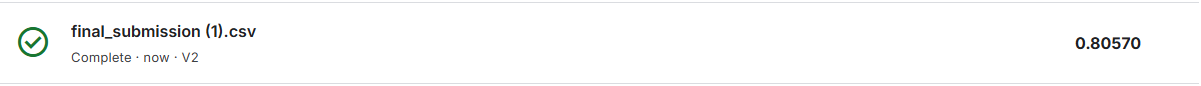